# Final Assignment Machine Learning

## Introduction

Below 2 cases are shortly presented. 

The first case has a small amount of data and is fairly easy, and the second case is of intermediate level.

For this final assignment you should work out both cases. Every case can be considered as a typical classification problem. The data of both cases is available on the UCI website. Both cases have labels.

For each case the following should be done:
+ Formulate the question are you trying the answer?
+ Clearly describe the problem that you want to solve.
+ What are the features and labels to start with, motivate your choices (e.g. based on literature).
+ Make a description of the dataset.
+ Find out which are the most important features, should you add and remove features?
+ Show how far can you go with K-means clustering?
+ Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores. 
+ Motivate your choices, and of course, support your research journey with appealing and informative graphs and diagrams.

## Case 1 - Wine Quality

**Data Set Information**

The data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 

See: [UCI Wine](http://archive.ics.uci.edu/ml/datasets/Wine)

##### Formulate the question are you trying the answer?


1. Given features of the wine, can we say which cultivar is used?

##### Clearly describe the problem that you want to solve.


There are alot of wines with only 13 attributes, however it is not know which cultivar they belong too. The problem to solve is to split the wines into 3 groups for each sultivar one group.

##### What are the features and labels to start with, motivate your choices (e.g. based on literature).


There are 3 labels and 8 features.

The labels:

- class 1 with 59 wines

- class 2 with 71 wines

- Class 3 with 48 wines

The features: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline

##### Make a description of the dataset.


from http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

Title of Database: Wine recognition data

These data are the results of a chemical analysis of
wines grown in the same region in Italy but derived from three
different cultivars.
The analysis determined the quantities of 13 constituents
found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but 
for some reason I only have the 13 dimensional version. 
I had a list of what the 30 or so variables were, but a.) 
I lost it, and b.), I would not know which 13 variables
are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline            


##### Find out which are the most important features, should you add and remove features?


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##Make sure to run the following in cmd: pip install seaborn 
#import seaborn as sns
%matplotlib inline

df = pd.read_csv('wine.data', header=None, sep='\s+')
df.columns = ['class', 'alcohol','acid','ash', 'alcash', 'magn', 'totalphen', 'flav', 'nonflavphen', 'proan', 'color','hue','diluted', 'proline']
cols = ['alcohol','acid','ash', 'alcash', 'magn', 'totalphen', 'flav', 'nonflavphen', 'proan','hue', 'diluted', 'proline']

#Make the X and y
X = df[cols].values
y = df['class'].values

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, None, step=1)
selector = selector.fit(X, y)

print(selector.support_) 

index = 0
colstouse = []
for boolean in selector.support_:
    if boolean == True:
        colstouse.append(cols[index])
    index = index + 1

print(cols)
print(colstouse)
print(selector.ranking_)

#Below is my try to use PCA, this didn't work?
#from sklearn import decomposition
#pca = decomposition.PCA(copy=True)
#X = df[cols].values
#pca.fit(X)
#array = [x for x in pca.explained_variance_ratio_ if x > 0.005]
#print(array)
#pca.n_components = 3
#X_reduced = pca.fit_transform(X)
#X = X_reduced

#This commented section is my old way to find features
#cols = ['class', 'alcohol','acid','ash', 'alcash', 'magn', 'totalphen', 'flav', 'nonflavphen', 'proan','hue', 'diluted', 'proline']
#cm = np.corrcoef(df[cols].values, rowvar=0)
#sns.set(font_scale=1)
#hm = sns.heatmap(cm,
#    cbar=True,
#    annot=True,
#    square=True,
#    fmt='.2f',
#    annot_kws={'size':  10},
#    yticklabels=cols,
#    xticklabels=cols)
#plt.show()

#By looking at the plot below the following can be said:
# the columns: acid, alcash and nonflavphen are the columns that have the 
#most collision with class. those 3 should be used

#About the adding or removing of features, I wouldn't know, this is the data 
#that I got. the data that could be removed are the columns that we don't use.

[ True False False False False  True  True  True False  True  True False]
['alcohol', 'acid', 'ash', 'alcash', 'magn', 'totalphen', 'flav', 'nonflavphen', 'proan', 'hue', 'diluted', 'proline']
['alcohol', 'totalphen', 'flav', 'nonflavphen', 'hue', 'diluted']
[1 5 2 4 6 1 1 1 3 1 1 7]


##### Show how far can you go with K-means clustering?


For every real '0' labeled there were '0' predicted to be a different class

For every real '1' labeled there were '4' predicted to be a different class, '4' where labeled as '2'

For every real '2' labeled there were '17' predicted to be a different class, '7' where labeled as '1'



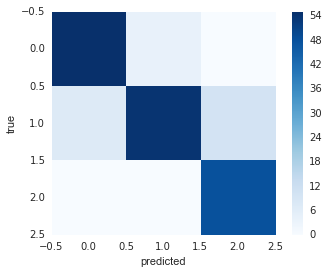

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Make the X and y
X = df[colstouse].values
y = df['class'].values

#Create 3 clusters, since there are 3 species
est = KMeans(3)  # 3 clusters
est.fit(X)
y_kmeans = est.predict(X)

#Permute the cluster labels if necessary (they are probably not the same as the real labels).
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(df['class'].values[mask])[0]
    
#How accurate is the KMeans classifier?
for i in range(3):
    mask = (df['class'].values == i)
    array = [label for label in labels[mask] if label != i]
    
    strtoprint = "For every real '" + str(i) + "' labeled there were '" + str(len(array)) + "' predicted to be a different class"
    
    for x in range(3):
        if x in array:
            arraytouse = [label for label in array if label == x]
            strtoprint = strtoprint + ", '" + str(len(arraytouse)) + "' where labeled as '" + str(x) + "'"
        
    print(strtoprint)
    print()

#Plot the confusion matrix.
# Here is a piece of code to plot the confusion matrix
plt.imshow(confusion_matrix(y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

##### Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores.


In [138]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

df['classnew'] = df['class'].map({1: 0, 2: 1, 3:2})
y = df['classnew']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)

from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

##################################################################################################
##################################################################################################
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, n_jobs=1)
#clf = RandomForestClassifier(n_estimators=30) #Without job as 1 accuracy is 0.04 less
#clf = RandomForestClassifier(n_estimators=10) # Less estimators is less accuracy
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('RandomForestClassifier:')
print(metrics.accuracy_score(y_test, y_pred))
print()

##################################################################################################
##################################################################################################
from sklearn import svm
clf = svm.SVC()#Rbf kernel is default, not default is ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
#clf = svm.SVC(kernel='linear')
#clf = svm.SVC(kernel='poly')
#clf = svm.SVC(kernel='sigmoid') #This gives less then 0.5
#clf = svm.SVC(kernel='precomputed') #Throws an error


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('svm with RBF kernel:')
print(metrics.accuracy_score(y_test, y_pred))
print()

##################################################################################################
##################################################################################################
# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Show the accuracy
from sklearn import metrics
print('SGDClassifier:')
print(metrics.accuracy_score(y_test, y_pred))


RandomForestClassifier:
0.972222222222

svm with RBF kernel:
0.944444444444

SGDClassifier:
0.944444444444


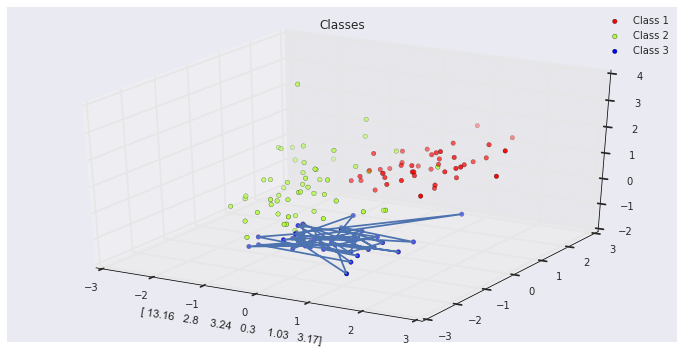

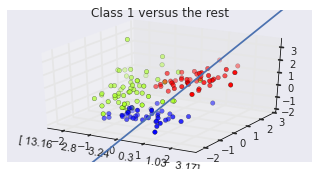

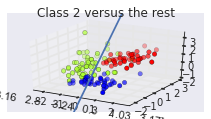

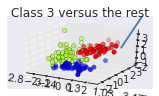

In [139]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title('Classes')

colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    x3s = X_train[:, 2][y_train.as_matrix() == i]

    ax1.scatter(x1s, x2s, x3s, c=colors[i])
    
    #ax1.set_xlabel(X.columns[0])
    #ax1.set_ylabel(X.columns[1])
    #ax1.set_zlabel(X.columns[2])
    ax1.set_xlabel(X[0])
    ax1.set_xlabel(X[1])
    ax1.set_xlabel(X[2])
    ax1.legend(['Class 1','Class 2','Class 3'])   # maintain order from dataset preparation!
ax1.plot(x1s, x2s, x3s)

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
z_min, z_max = X_train[:, 2].min() - .5, X_train[:, 2].max() + .5
xs = np.arange(x_min, x_max, 0.5)

fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax2 = fig1.add_subplot(222, projection='3d')
ax3 = fig2.add_subplot(333, projection='3d')
ax4 = fig3.add_subplot(444, projection='3d')

#fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)
fig1.set_size_inches(12,6)
fig2.set_size_inches(12,6)
fig3.set_size_inches(12,6)

# for each single class against two other classes
i = 0
ax2.set_title('Class ' + str(i + 1) + ' versus the rest')
#ax2.set_xlabel(X.columns[0])
#ax2.set_ylabel(X.columns[1])
#ax2.set_zlabel(X.columns[2])
ax2.set_xlabel(X[0])
ax2.set_xlabel(X[1])
ax2.set_xlabel(X[2])
#ax2.set_aspect('equal')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax2.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax2.plot(xs,ys,zs)

i = 1
ax3.set_title('Class ' + str(i + 1) + ' versus the rest')
ax3.set_xlabel(X[0])
ax3.set_xlabel(X[1])
ax3.set_xlabel(X[2])
#ax3.set_xlabel(X.columns[0])
#ax3.set_ylabel(X.columns[1])
#ax3.set_zlabel(X.columns[2])
#ax3.set_aspect('equal')
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)
ax3.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax3.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax3.plot(xs,ys,zs)

i = 2
ax4.set_title('Class ' + str(i +1) + ' versus the rest')
#ax4.set_xlabel(X.columns[0])
#ax4.set_ylabel(X.columns[1])
#ax4.set_zlabel(X.columns[2])
ax4.set_xlabel(X[0])
ax4.set_xlabel(X[1])
ax4.set_xlabel(X[2])
#ax4.set_aspect('equal')
ax4.set_xlim(x_min, x_max)
ax4.set_ylim(y_min, y_max)
ax4.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax4.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax4.plot(xs,ys,zs)

plt.show()


## Case 2 - Heart Disease

**Data Set Information**

A number of attributes are listed that possibly influence heart diseases. The presence of heart disease in the patient is an integer valued from 0 (no presence) to 4. 

The names and social security numbers of the patients were recently removed from the database, and replaced with dummy values. 

One file has been "processed", i.e. the Cleveland database (use this one!). 

See: [UCI Heart Disease](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)

##### Formulate the question are you trying the answer?
NEW: Given 14 features about a patient, try to find out if a patient has a presence of heart disease!

OLD: Given 14 features about a patient, try to find out which presence of heart disease the patient has!

##### Clearly describe the problem that you want to solve.
The problem to solve here is to classify all patients in a matter that 5 groups are found. Those 5 groups tell us about the presence of a heart disease by the patient.

##### What are the features and labels to start with, motivate your choices (e.g. based on literature).
labels: 
0 to 4. 0 meaning no presence, while 4 means the most presence.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them

Only 14 attributes used: 

1. #3 (age) 

2. #4 (sex) 

3. #9 (cp) 

4. #10 (trestbps) 

5. #12 (chol) 

6. #16 (fbs) 

7. #19 (restecg) 

8. #32 (thalach) 

9. #38 (exang) 

10. #40 (oldpeak) 

11. #41 (slope) 

12. #44 (ca) 

13. #51 (thal) 

14. #58 (num) (the predicted attribute) 


##### Make a description of the dataset.
This database contains 76 attributes, but all published experiments
refer to using a subset of 14 of them.  In particular, the Cleveland
database is the only one that has been used by ML researchers to 
this date.  The "goal" field refers to the presence of heart disease
in the patient.  It is integer valued from 0 (no presence) to 4.
Experiments with the Cleveland database have concentrated on simply
attempting to distinguish presence (values 1,2,3,4) from absence (value
0).  

The names and social security numbers of the patients were recently 
removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland 
database.  All four unprocessed files also exist in this directory.


     
Database:####0####1###2###3###4###Total

Cleveland:####164##55##36##35##13##303

Hungarian:####188##37##26##28##15##294

Switzerland:###8###48##32##30##5###123

Long Beach VA:#51##56##41##42##10##200


##### Find out which are the most important features, should you add and remove features?


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Make sure to run the following in cmd: pip install seaborn 
#import seaborn as sns
%matplotlib inline

#df = pd.read_csv('cleveland1.data', header=None, sep='\s+')
df = pd.read_csv('clevelandedited.csv', header=None, sep=';')

df.columns = ['age', 'sex','cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca','thal', 'num']

cols = ['age', 'sex','cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca','thal']

#Make the X and y
X = df[cols].values
y = df['num'].values

df[0:3]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1

In [141]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_ 

print(selector.support_) 
index = 0
colstouse = []
for boolean in selector.support_:
    if boolean == True:
        colstouse.append(cols[index])
    index = index + 1
print(cols)
print(colstouse)

#Make the X and y
X = df[colstouse].values
y = df['num'].values

#from sklearn.feature_selection import RFE
#from sklearn.svm import SVR
#estimator = SVR(kernel="linear")
#selector = RFE(estimator, None, step=1)
#selector = selector.fit(X, y)
#print(selector.support_) 
#index = 0
#colstouse = []
#for boolean in selector.support_:
#    if boolean == True:
#        colstouse.append(cols[index])
#    index = index + 1
#print(cols)
#print(colstouse)

#Make the X and y
#X = df[colstouse].values
#y = df['num'].values

#Below is my try to use PCA, this didn't work?
#from sklearn import decomposition
#pca = decomposition.PCA()
#X = df[cols].values
#pca.fit(X)
#print(pca.explained_variance_ratio_)
#array = [x for x in pca.explained_variance_ratio_ if x > 0.05]
#print(len(array))
#pca.n_components = len(array)
#X_reduced = pca.fit_transform(X)
#X = X_reduced

#This commented section is my old way to find features
#cols = ['age', 'sex','cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','num']
#cm = np.corrcoef(df[cols].values, rowvar=0)
#sns.set(font_scale=1)
#hm = sns.heatmap(cm,
#    cbar=True,
#    annot=True,
#    square=True,
#    fmt='.2f',
#    annot_kws={'size':  10},
#    yticklabels=cols,
#    xticklabels=cols)
#plt.show()

[ True  True  True  True False  True  True  True  True  True  True  True
  True]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# Show how far can you go with K-means clustering?


For every real '0' labeled there were '9' predicted to be a different class, '9' where labeled as '3'

For every real '1' labeled there were '54' predicted to be a different class, '46' where labeled as '0', '8' where labeled as '3'

For every real '2' labeled there were '35' predicted to be a different class, '25' where labeled as '0', '10' where labeled as '3'

For every real '3' labeled there were '23' predicted to be a different class, '23' where labeled as '0'

For every real '4' labeled there were '13' predicted to be a different class, '8' where labeled as '0', '5' where labeled as '3'



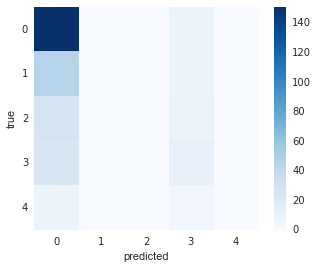

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Create 5 clusters, since there are 5 stages
est = KMeans(5)  # 5 clusters
est.fit(X)
y_kmeans = est.predict(X)

#Permute the cluster labels if necessary (they are probably not the same as the real labels).
#from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(5):
    mask = (y_kmeans == i)
    labels[mask] = mode(df['num'].values[mask])[0]
    
#How accurate is the KMeans classifier?
for i in range(5):
    mask = (df['num'].values == i)
    array = [label for label in labels[mask] if label != i]
    
    strtoprint = "For every real '" + str(i) + "' labeled there were '" + str(len(array)) + "' predicted to be a different class"
    
    for x in range(5):
        if x in array:
            arraytouse = [label for label in array if label == x]
            strtoprint = strtoprint + ", '" + str(len(arraytouse)) + "' where labeled as '" + str(x) + "'"
        
    print(strtoprint)
    print()

#Plot the confusion matrix.
# Here is a piece of code to plot the confusion matrix
plt.imshow(confusion_matrix(y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

##### Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores.


In [143]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

#Format all presence to 1. to make a division between does and doesn't have presence of heart disease.
df['classnew'] = df['num'].map({0:0, 1:1, 2:1, 3:1, 4:1})
y = df['classnew']
#y = df['num']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)

from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

##################################################################################################
##################################################################################################
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, n_jobs=1)
#clf = RandomForestClassifier(n_estimators=30) #Without job as 1 accuracy is 0.04 less
#clf = RandomForestClassifier(n_estimators=10) # Less estimators is less accuracy
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('RandomForestClassifier:')
print(metrics.accuracy_score(y_test, y_pred))
print()

##################################################################################################
##################################################################################################
from sklearn import svm
clf = svm.SVC()#Rbf kernel is default, not default is ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
#clf = svm.SVC(kernel='linear')
#clf = svm.SVC(kernel='poly')
#clf = svm.SVC(kernel='sigmoid') #This gives less then 0.5
#clf = svm.SVC(kernel='precomputed') #Throws an error


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('svm with RBF kernel:')
print(metrics.accuracy_score(y_test, y_pred))
print()

##################################################################################################
##################################################################################################
# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Show the accuracy
from sklearn import metrics
print('SGDClassifier:')
print(metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier:
0.85

svm with RBF kernel:
0.833333333333

SGDClassifier:
0.816666666667


IndexError: index 1 is out of bounds for axis 0 with size 1

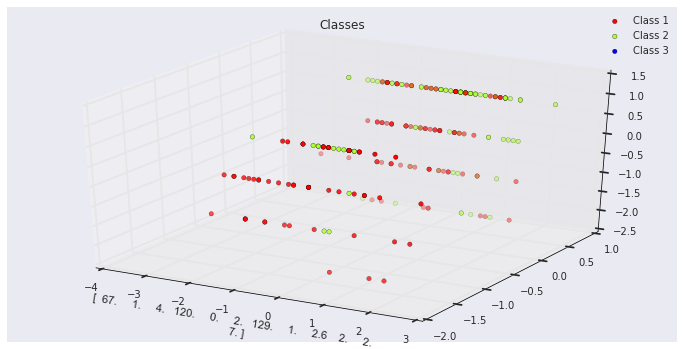

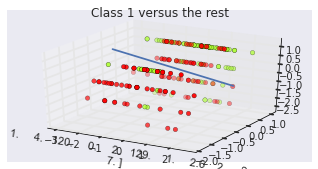

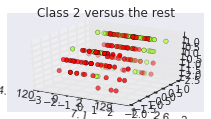

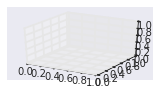

In [144]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title('Classes')

colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    x3s = X_train[:, 2][y_train.as_matrix() == i]

    ax1.scatter(x1s, x2s, x3s, c=colors[i])
    
    #ax1.set_xlabel(X.columns[0])
    #ax1.set_ylabel(X.columns[1])
    #ax1.set_zlabel(X.columns[2])
    ax1.set_xlabel(X[0])
    ax1.set_xlabel(X[1])
    ax1.set_xlabel(X[2])
    ax1.legend(['Class 1','Class 2','Class 3'])   # maintain order from dataset preparation!
ax1.plot(x1s, x2s, x3s)

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
z_min, z_max = X_train[:, 2].min() - .5, X_train[:, 2].max() + .5
xs = np.arange(x_min, x_max, 0.5)

fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax2 = fig1.add_subplot(222, projection='3d')
ax3 = fig2.add_subplot(333, projection='3d')
ax4 = fig3.add_subplot(444, projection='3d')

#fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)
fig1.set_size_inches(12,6)
fig2.set_size_inches(12,6)
fig3.set_size_inches(12,6)

# for each single class against two other classes
i = 0
ax2.set_title('Class ' + str(i + 1) + ' versus the rest')
#ax2.set_xlabel(X.columns[0])
#ax2.set_ylabel(X.columns[1])
#ax2.set_zlabel(X.columns[2])
ax2.set_xlabel(X[0])
ax2.set_xlabel(X[1])
ax2.set_xlabel(X[2])
#ax2.set_aspect('equal')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax2.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax2.plot(xs,ys,zs)

i = 1
ax3.set_title('Class ' + str(i + 1) + ' versus the rest')
ax3.set_xlabel(X[0])
ax3.set_xlabel(X[1])
ax3.set_xlabel(X[2])
#ax3.set_xlabel(X.columns[0])
#ax3.set_ylabel(X.columns[1])
#ax3.set_zlabel(X.columns[2])
#ax3.set_aspect('equal')
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)
ax3.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax3.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax3.plot(xs,ys,zs)

i = 2
ax4.set_title('Class ' + str(i +1) + ' versus the rest')
#ax4.set_xlabel(X.columns[0])
#ax4.set_ylabel(X.columns[1])
#ax4.set_zlabel(X.columns[2])
ax4.set_xlabel(X[0])
ax4.set_xlabel(X[1])
ax4.set_xlabel(X[2])
#ax4.set_aspect('equal')
ax4.set_xlim(x_min, x_max)
ax4.set_ylim(y_min, y_max)
ax4.set_zlim(z_min, z_max)
for j in range(len(colors)):
    px = X_train[:, 0][y_train.as_matrix() == j]
    py = X_train[:, 1][y_train.as_matrix() == j]
    pz = X_train[:, 2][y_train.as_matrix() == j]
    ax4.scatter(px, py, pz, c=colors[j])
ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
zs = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
ax4.plot(xs,ys,zs)

plt.show()

### Goodluck